Review

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table('fruit_colors.txt')

X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']


fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn3 = KNeighborsClassifier(n_neighbors = 5)

avg1 = 0
avg2 = 0
avg3 = 0

for i in range(10):
  X_train,X_test, y_train, y_test = train_test_split(X, y)
  knn1.fit(X_train,y_train)
  knn2.fit(X_train,y_train)
  knn3.fit(X_train,y_train)


  avg1 += knn1.score(X_test,y_test)
  avg2 += knn2.score(X_test,y_test)
  avg3 += knn3.score(X_test,y_test)

avg1 /= 10
avg2 /= 10
avg3 /= 10

print(avg1, "   ", avg2, "   ", avg3)

0.6000000000000001     0.6133333333333333     0.5733333333333333


Synthetic Datasets

Regression

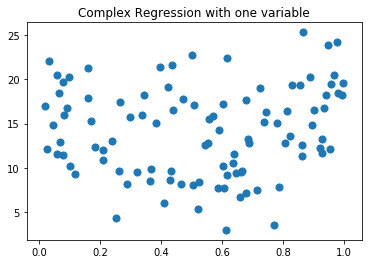

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex Regression with one variable')
x_f1, y_f1 = make_friedman1(n_samples = 100, n_features= 7, random_state = 0)
plt.scatter(x_f1[:, 2], y_f1, marker = 'o', s=50)
plt.show()

Binary Classification

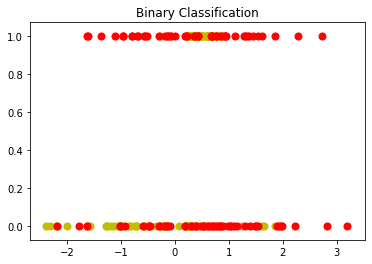

In [3]:
from sklearn.datasets import make_classification

plt.figure()
plt.title('Binary Classification')
x_c1, y_c1 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = 0.1,class_sep = 0.5, random_state = 0)
plt.scatter(x_c1[:, 0], y_c1, s = 50, c = 'y')
plt.scatter(x_c1[:, 1], y_c1, s = 50, c = 'r')

plt.show()

Knn Regression

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

fruits = pd.read_table('fruit_colors.txt')
x = fruits[['mass', 'width','height', 'color_score']]
y = fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x, y)

knn = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)
print('R sq. test score', knn.score(x_test, y_test))

R sq. test score 0.11924119241192432


Linear Regression

In [5]:
# Preprocess Data
fruits = pd.read_table('fruit_colors.txt')
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

linreg = LinearRegression().fit(x_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)

9.835739409255927
[ 0.01879966 -1.91964979  0.4226744 ]


0.11996287693912355


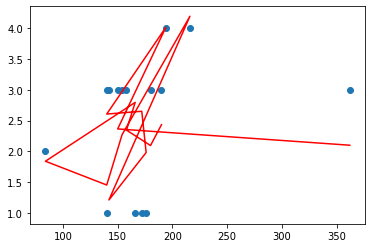

In [7]:
plt.figure()
plt.scatter(x_test.iloc[:, 0], y_test)
plt.plot(x_test.iloc[:, 0], linreg.predict(x_test), color= 'r')
print(linreg.score(x_test, y_test))

Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

rigreg = Ridge().fit(x_train, y_train)

print("train", rigreg.score(x_train,y_train))
print("test", rigreg.score(x_test,y_test))

train 0.72029053335627
test 0.18548582193014596


Ridge Regression with Min Max Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train_scaled, x_test_scaled, y_train_scaled,y_test_scaled = train_test_split(x_scaled, y, random_state = 0)

In [10]:
newridge = Ridge().fit(x_train_scaled, y_train_scaled)

print("train", newridge.score(x_train_scaled,y_train_scaled))
print("test", newridge.score(x_test_scaled,y_test_scaled))

train 0.5199061745325924
test 0.255759128189337


Lasso Regression


In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train_scaled,y_train)

print("train", lasso.score(x_train_scaled,y_train_scaled))
print("test", lasso.score(x_test_scaled,y_test_scaled))

train 0.0
test -0.00014007564084606017


Polynomial Transformation

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(x)
x_train_poly, x_test_poly,y_train_poly,  y_test_poly = train_test_split(x_poly, y, random_state = 0)

linreg = LinearRegression().fit(x_train_poly, y_train_poly)
print("train", linreg.score(x_train_poly,y_train_poly))
print("test", linreg.score(x_test_poly,y_test_poly))

train 0.7663254685262686
test -0.09915447336896377


Polynomial Transformation comparison

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

linreg = LinearRegression().fit(x_train_poly, y_train_poly)
ridge = Ridge().fit(x_train_poly, y_train_poly)
lasso = Lasso().fit(x_train_poly, y_train_poly)

print("linear train", linreg.score(x_train_poly,y_train_poly))
print("linear test", linreg.score(x_test_poly,y_test_poly))
print()
print("ridge train", ridge.score(x_train_poly,y_train_poly))
print("ridge test", ridge.score(x_test_poly,y_test_poly))
print()
print("lasso train", lasso.score(x_train_poly,y_train_poly))
print("lasso test", lasso.score(x_test_poly,y_test_poly))

linear train 0.7663254685262686
linear test -0.09915447336896377

ridge train 0.7506693907475959
ridge test 0.3338590515005859

lasso train 0.7112421933346724
lasso test 0.2369284845395031


Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

x_2d = fruits[['height', 'width']]
y_2d = fruits['fruit_label'] 
y_2d = (y_2d == 1) #label is apple or not

x_2d_train, x_2d_test, y_2d_train, y_2d_test = train_test_split(x_2d, y_2d, random_state = 0)

logreg = LogisticRegression().fit(x_2d_train, y_2d_train)

print("train", logreg.score(x_2d_train, y_2d_train))
print("test", logreg.score(x_2d_test, y_2d_test))

train 0.75
test 0.6666666666666666


Linear CLassifiers

Support Vector Classifer

In [15]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear').fit(x_train, y_train)

print("train", clf.score(x_train, y_train))
print("test", clf.score(x_test, y_test))

train 0.8181818181818182
test 0.6


Multi Class Classifiers with Linear Models

To show this we show the coefficients & intercepts of the linear svc and  see that there are multiple values instead of just one

In this instance sklaern creates a seperate binary classifier for each category and pushes the coefficient and intercept values to the linear svc. The category with the highest points is predicted to be true


In [16]:
print("Coefficients w\n" ,clf.coef_)
print()
print("intercepts b\n" ,clf.intercept_)

Coefficients w
 [[ 3.02424839e-02  6.41507235e-04  1.19137058e-03]
 [-2.12594919e-02  1.15556036e+00 -6.10239051e-01]
 [ 2.64397468e-02  7.01519998e-01 -1.37490811e+00]
 [-3.44045288e-02 -3.55908919e-04 -1.60159013e-03]
 [-6.60880577e-02  4.40587051e-04 -6.16821872e-03]
 [ 4.16380038e-02  6.90107186e-01 -1.92052285e+00]]

intercepts b
 [-3.61043044  0.2842815   2.0347587   3.96852391  6.70983262  4.43259876]


Kernelized Support Vector Calssifiers

Radial Kernel

In [17]:
from sklearn.svm import SVC

rfb = SVC(kernel='rbf').fit(x_train, y_train)

print("train", rfb.score(x_train, y_train))
print("test", rfb.score(x_test, y_test))

train 0.5909090909090909
test 0.26666666666666666


Polynomial Kernel

In [18]:
from sklearn.svm import SVC

poly = SVC(kernel = "poly", degree = 4).fit(x_train, y_train)


print("train", poly.score(x_train, y_train))
print("test", poly.score(x_test, y_test))

train 0.5909090909090909
test 0.26666666666666666


Cross Validationn

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

np.mean(cross_val_score(knn,x,y))

0.5409090909090909

Validation Curve

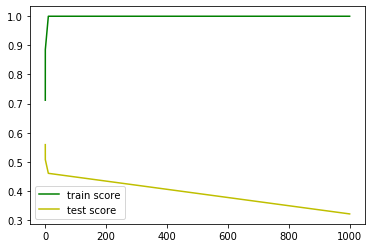

In [20]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
 
p_range = np.logspace(-3,3,4)
train_score, test_score = validation_curve(SVC(), x , y, param_name='gamma', param_range=p_range)

mean = []
for i in range(len(train_score)):
  mean.append(np.mean(train_score[i]))

train_score = mean

mean = []
for i in range(len(test_score)):
  mean.append(np.mean(test_score[i]))

test_score = mean

plt.figure()
plt.plot(p_range, train_score, color = 'g', label = 'train score')
plt.plot(p_range, test_score, color = 'y', label = 'test score')
plt.legend()

Descion Trees using iris dataset

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_iris = iris.data
y_iris = iris.target
iris_names = iris.target_names

x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(x_iris, y_iris, random_state = 0)

In [22]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier().fit(x_iris_train, y_iris_train)

print("train", dtree.score(x_iris_train, y_iris_train))
print("test", dtree.score(x_iris_test, y_iris_test))

train 1.0
test 0.9736842105263158


Limiting Max Depth of tree

In [23]:
dtree = DecisionTreeClassifier(max_depth=3).fit(x_iris_train, y_iris_train)

print("train", dtree.score(x_iris_train, y_iris_train))
print("test", dtree.score(x_iris_test, y_iris_test))

train 0.9821428571428571
test 0.9736842105263158
